In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [158]:
#import data
data = pd.read_excel(r"D:\Suhani\Advertising data.xlsx")
data

,Day,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [159]:
#about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Day                      200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [160]:
#check for empty cells
data.isnull().sum()

Day                        0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

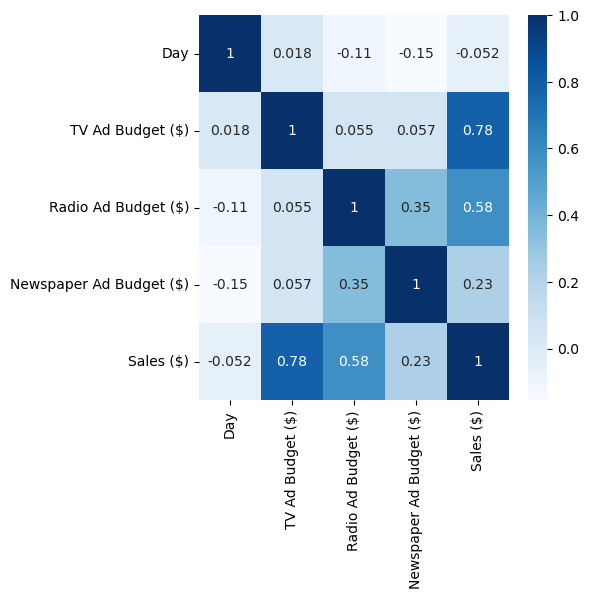

In [161]:
#Express the correlation matrix in the form of hheat map
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(),cmap='Blues',annot=True)
plt.show()

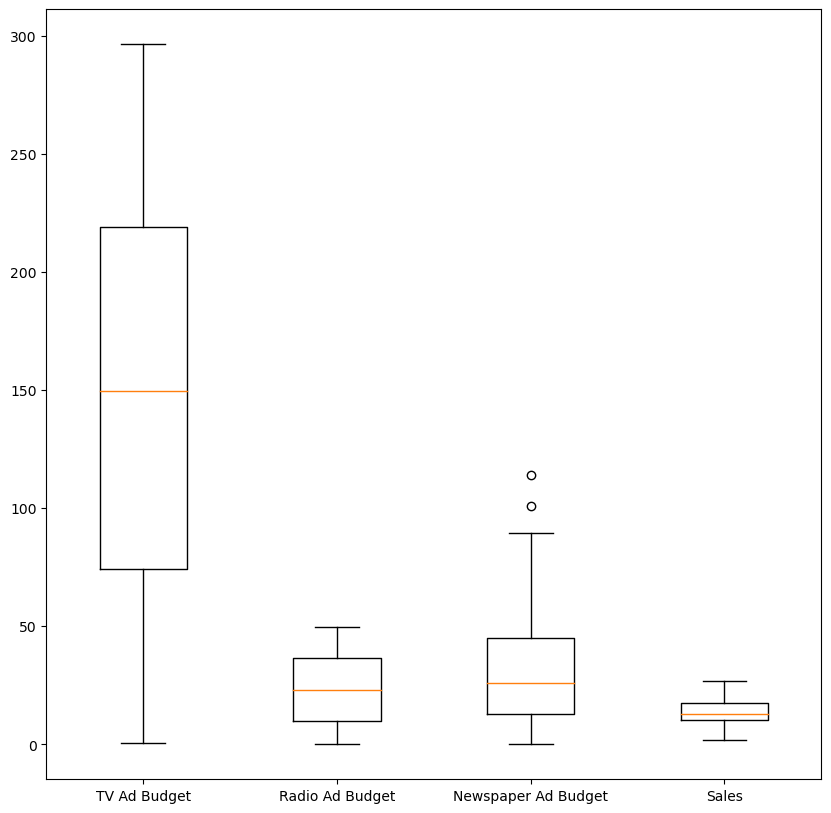

In [162]:
data1=data.drop(['Day'],axis=1)
labels=['TV Ad Budget','Radio Ad Budget','Newspaper Ad Budget','Sales']

plt.figure(figsize=(10,10))
plt.boxplot(data1,labels=labels)
plt.show()

In [163]:
data.describe()

,Day,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [164]:
Q3=45.1
Q1=12.75
IQR = Q3-Q1
upper =Q3+(1.5*IQR)
upper

93.625

In [165]:
#identifying the outliers
outlier = data[data['Newspaper Ad Budget ($)']>=upper]
outlier

,Day,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
16,17,67.8,36.6,114.0,12.5
101,102,296.4,36.3,100.9,23.8


In [166]:
#remove the outliers from the data
data = data.drop(index=[16,101])
data

,Day,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


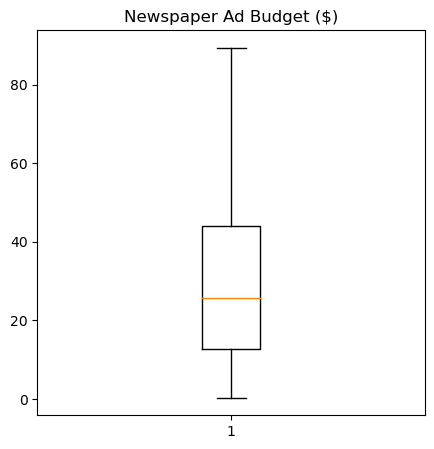

In [167]:
plt.figure(figsize=(5,5))
plt.boxplot(data["Newspaper Ad Budget ($)"])
plt.title("Newspaper Ad Budget ($)")
plt.show()

In [168]:
X = data.drop(['Sales ($)','Day'],axis=1)
y = data['Sales ($)']

In [169]:
#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3,test_size=0.1)

In [170]:
l_r=LinearRegression()
l_r.fit(X_train,y_train)

y_train_pred_l_r=l_r.predict(X_train)

#check the accuracy based on rsquare and adj_rsquare
r2_score_train_data = r2_score(y_train_pred_l_r,y_train)
print("R2 value of training data:",r2_score_train_data)

n1=len(X_train)
k1=X_train.shape[1]
adj_r2_training = 1 - ((1-r2_score_train_data)*(n1-1)/(n1-k1-1))
print("Adjusted Rsquare of Training data:",adj_r2_training)


r_f.fit(X_test,y_test)

y_test_pred_l_r=l_r.predict(X_test)

#check the accuracy based on rsquare and adj_rsquare
r2_score_test_data = r2_score(y_test_pred_l_r,y_test)
print("R2 value of test data:",r2_score_test_data)

n1=len(X_test)
k1=X_train.shape[1]
adj_r2_testing = 1 - ((1-r2_score_test_data)*(n1-1)/(n1-k1-1))
print("Adjusted Rsquare of test data:",adj_r2_testing)

R2 value of training data: 0.8751501760643633
Adjusted Rsquare of Training data: 0.8729975928930592
R2 value of test data: 0.9279315852822686
Adjusted Rsquare of test data: 0.914418757522694


In [171]:
r_f=RandomForestRegressor()
r_f.fit(X_train,y_train)

y_train_pred_r_f=r_f.predict(X_train)

#check the accuracy based on rsquare and adj_rsquare
r2_score_train_data = r2_score(y_train_pred_r_f,y_train)
print("R2 value of training data:",r2_score_train_data)

n1=len(X_train)
k1=X_train.shape[1]
adj_r2_training = 1 - ((1-r2_score_train_data)*(n1-1)/(n1-k1-1))
print("Adjusted Rsquare of Training data:",adj_r2_training)


r_f.fit(X_test,y_test)

y_test_pred_r_f=r_f.predict(X_test)

#check the accuracy based on rsquare and adj_rsquare
r2_score_test_data = r2_score(y_test_pred_r_f,y_test)
print("R2 value of training data:",r2_score_test_data)

n1=len(X_test)
k1=X_train.shape[1]
adj_r2_testing = 1 - ((1-r2_score_test_data)*(n1-1)/(n1-k1-1))
print("Adjusted Rsquare of Training data:",adj_r2_testing)

R2 value of training data: 0.9969226092648061
Adjusted Rsquare of Training data: 0.9968695508038545
R2 value of training data: 0.9495393544155262
Adjusted Rsquare of Training data: 0.9400779833684373


In [172]:
#predicting for new data
new_data=(204.1,32.9,46)

#convert it into array
import numpy as np
new_data_=np.asarray(new_data)

#reshape the data
new_data_reshape=new_data_.reshape(1,-1)

#fit new_data to the regressor
new_data_predict=r_f.predict(new_data_reshape)
print(new_data_predict)

[18.663]


C:\Users\HEMA\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
